In [31]:
import addfips
import requests
import matplotlib.pyplot as plt
from IPython.display import Image
import folium
import pickle
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import pyproj
import collections
import numpy as np

%matplotlib inline

In [32]:
ws_geo = gpd.read_file('../data/test/watershedbreakout.shp')

In [51]:
ws_geo['global_rare'] = ws_geo['G1'] + ws_geo['G12'] + ws_geo['G2'] + ws_geo['G3']

In [54]:
ws_geo['global_notrare'] = ws_geo['G34'] + ws_geo['G4'] + ws_geo['G45'] + ws_geo['G5'] 

GRank 1

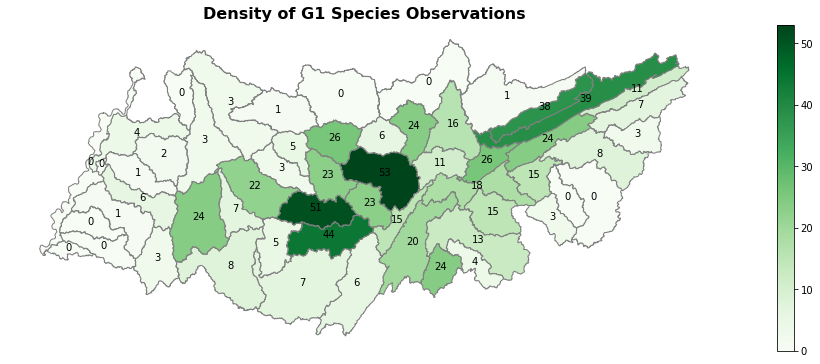

In [49]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'G1',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G1'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G1 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

GRank 2

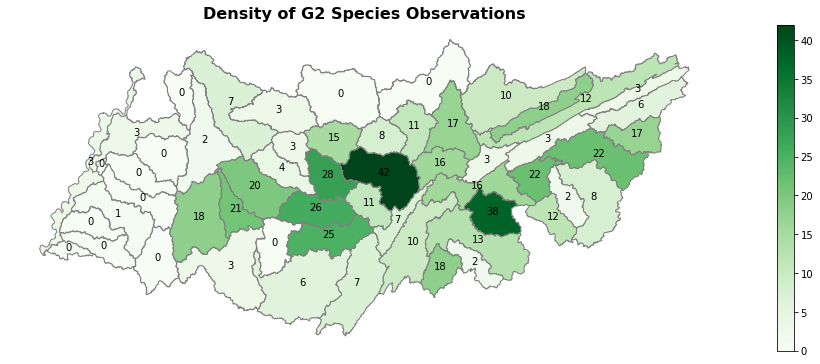

In [34]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'G2',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G2'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G2 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

I'd like to go into the Clinch River watershed and look at the Categories and Types.

G3

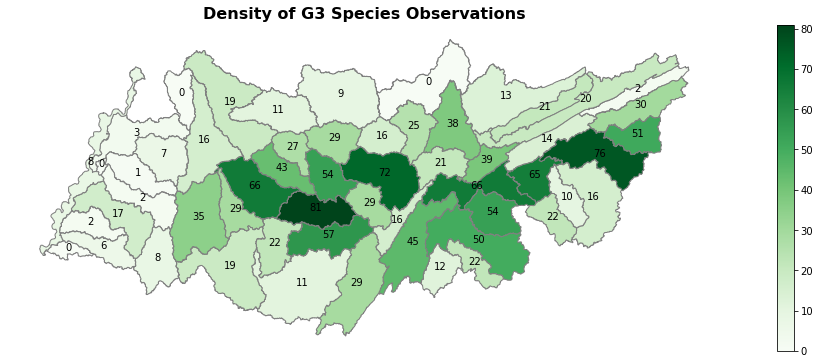

In [35]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'G3',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G3'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G3 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

G4

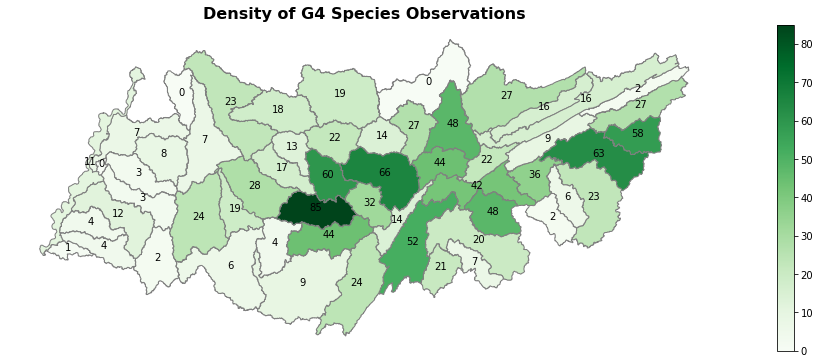

In [36]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'G4',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G4'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G4 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

G5

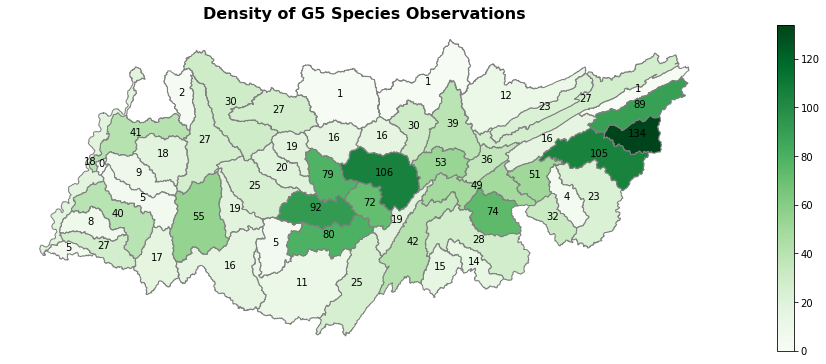

In [37]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'G5',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G5'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G5 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

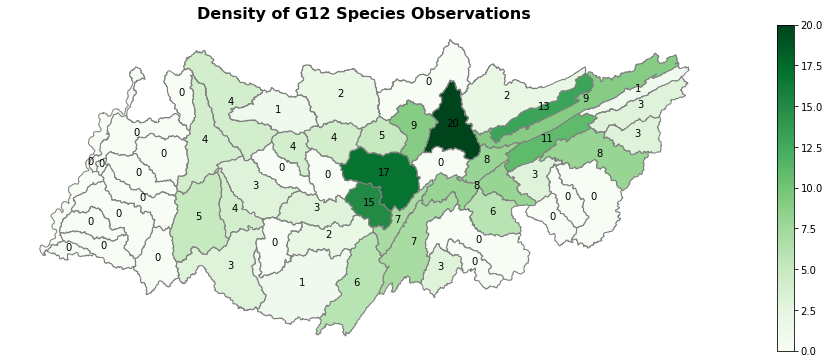

In [38]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'G12',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G12'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G12 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

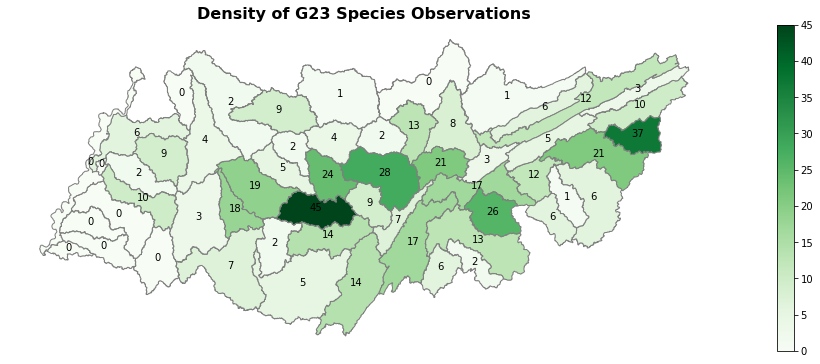

In [39]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'G23',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G23'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G23 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

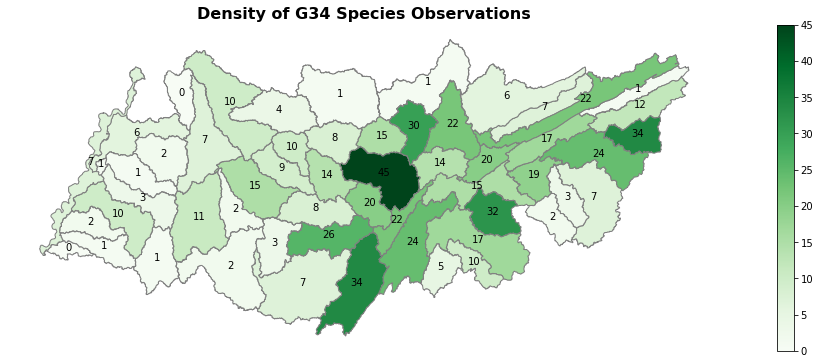

In [40]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'G34',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['G34'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of G34 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

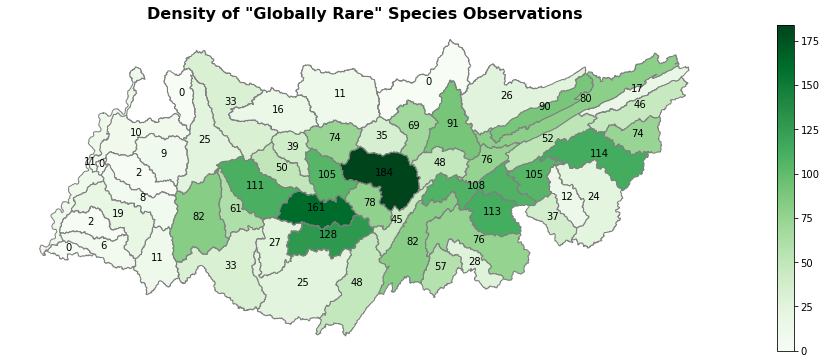

In [53]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'global_rare',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['global_rare'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of "Globally Rare" Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

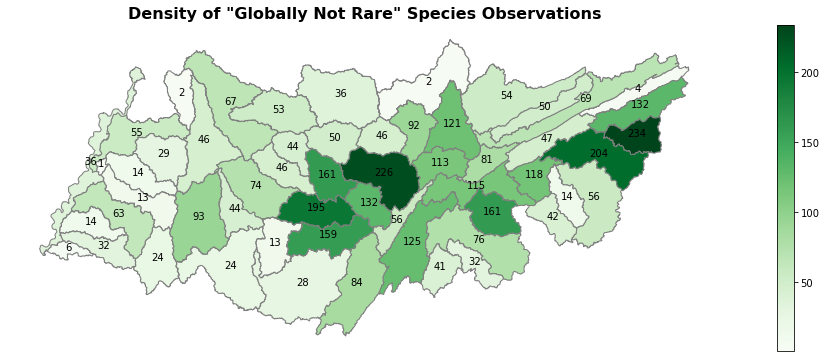

In [55]:
fig, ax = plt.subplots(figsize=(20,6))
ws_geo.plot(column = 'global_notrare',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['global_notrare'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of "Globally Not Rare" Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

### SWITCHIN' GEARS TO STATE RANKS

In [56]:
ws_geo['state_rare'] = ws_geo['S1'] + ws_geo['S12'] + ws_geo['S2'] + ws_geo['S3']

In [58]:
ws_geo['state_notrare'] = ws_geo['S34'] + ws_geo['S4'] + ws_geo['S5'] 

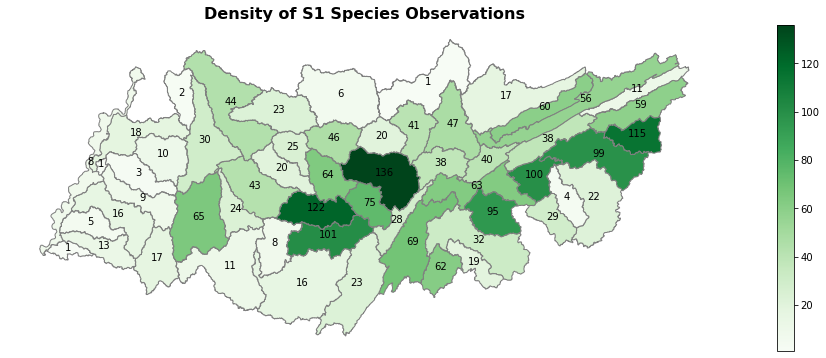

In [59]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'S1',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['S1'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of S1 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

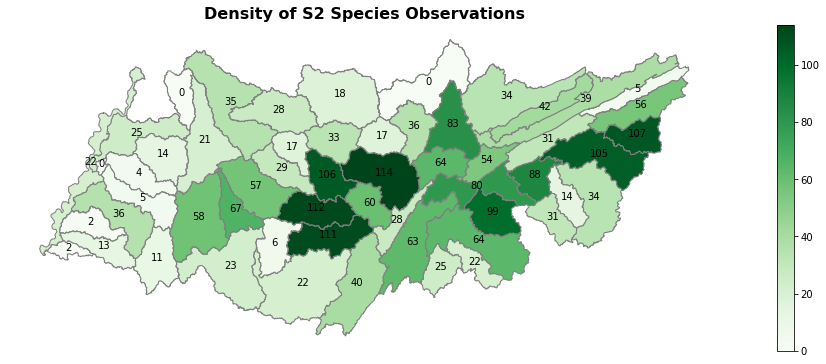

In [60]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'S2',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['S2'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of S2 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

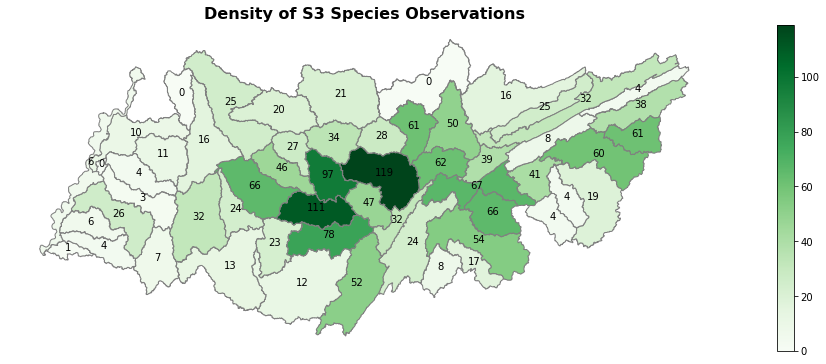

In [61]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'S3',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['S3'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of S3 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

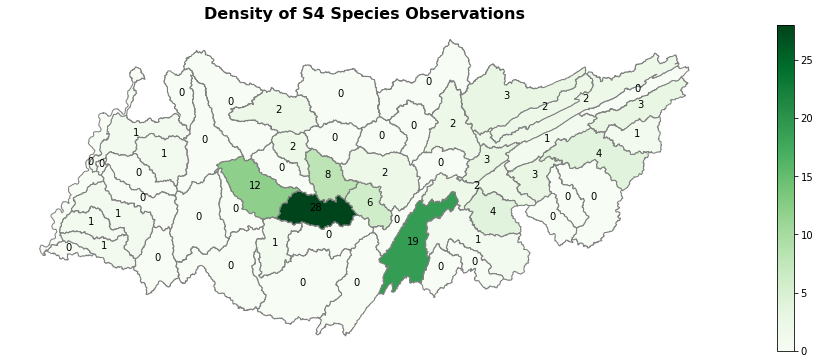

In [62]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'S4',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['S4'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of S4 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

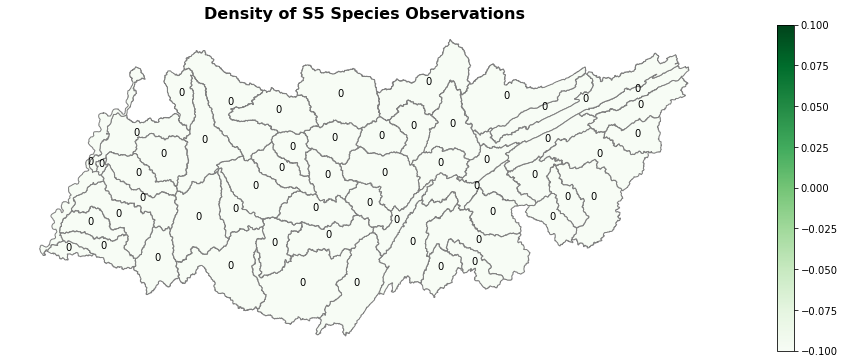

In [63]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'S5',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['S5'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of S5 Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

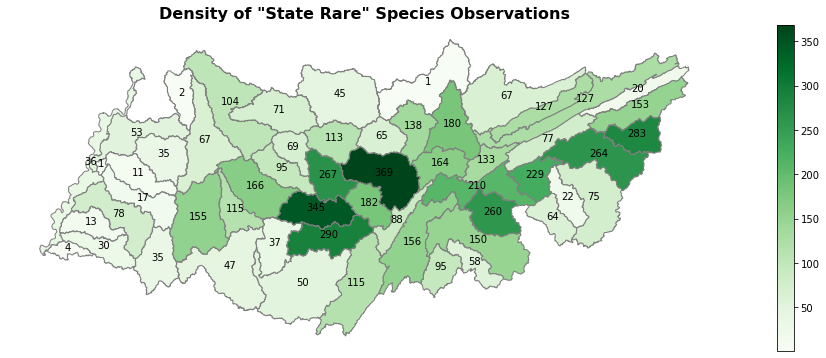

In [64]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'state_rare',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['state_rare'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of "State Rare" Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

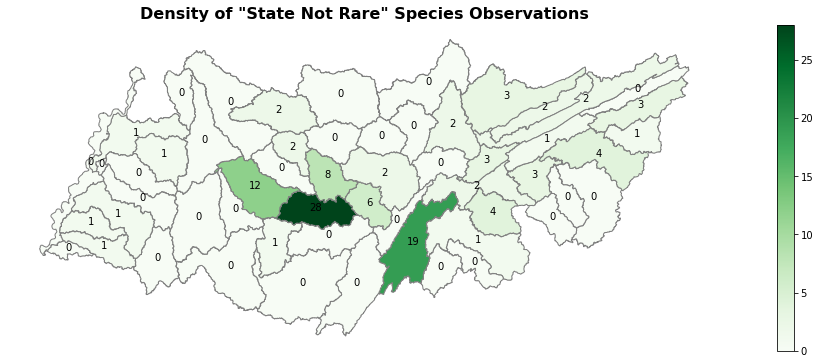

In [65]:
fig, ax = plt.subplots(figsize=(20, 6))
ws_geo.plot(column = 'state_notrare',
               cmap = 'Greens',
               edgecolor = 'grey',
               legend = True,
               ax = ax)
for index, row in ws_geo.iterrows():
    plt.annotate(text=row['state_notrare'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.title('Density of "State Not Rare" Species Observations', fontsize = 16, fontweight = 'bold')
ax.axis('off');

### SWITCHIN' GEARS TO FEDERAL STATUS